In [1]:
# Problem Statement : To find out the relationship between strength of the concrete and the other attributes.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
nn=pd.read_csv("concrete.csv")

In [4]:
nn.shape

(1030, 9)

In [5]:
nn.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
418,388.6,97.1,0.0,157.9,12.1,852.1,925.7,91,57.60
196,231.8,0.0,121.6,174.0,6.7,1056.4,778.5,14,26.77
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
509,153.0,102.0,0.0,192.0,0.0,888.0,943.1,7,8.37
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.90
982,284.0,119.7,0.0,168.3,7.2,970.4,794.2,28,40.93
975,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28,39.58
940,153.6,144.2,112.3,220.1,10.1,923.2,657.9,28,16.50
43,149.0,118.0,92.0,183.0,7.0,953.0,780.0,28,23.52
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


In [6]:
nn.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
nn.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [8]:
nn.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
nn.describe(include="all")

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


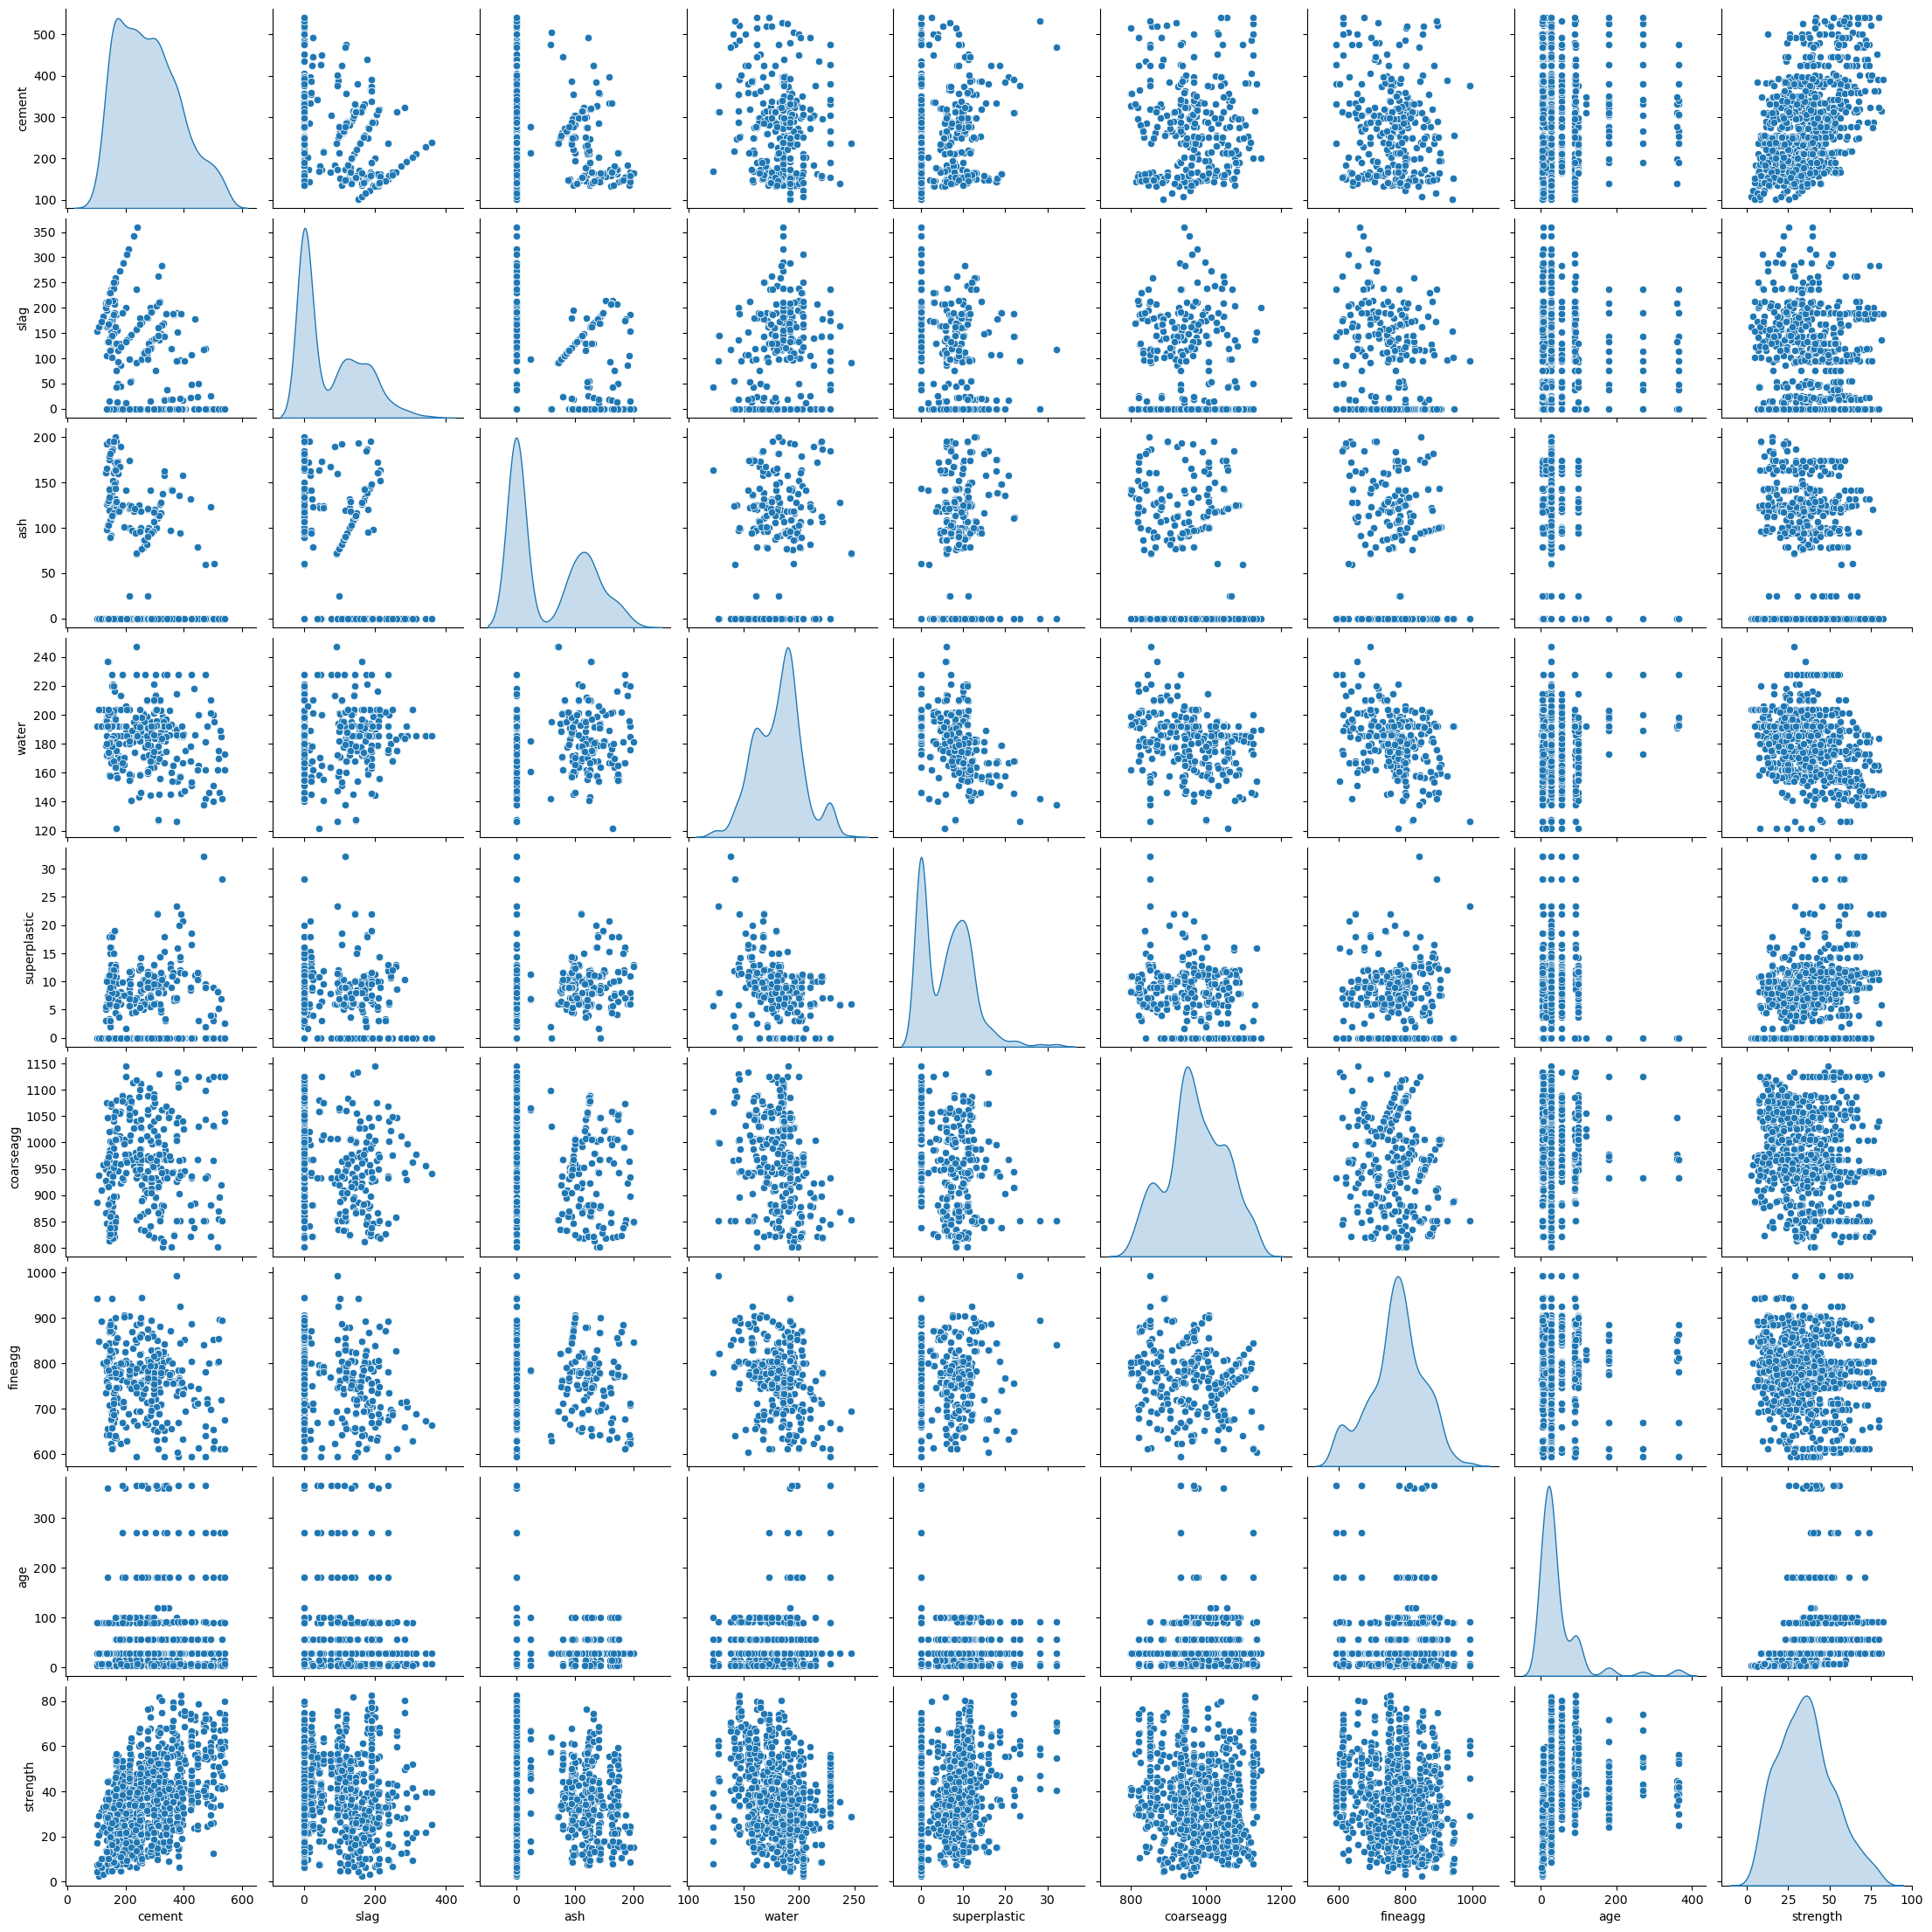

In [11]:
sns.pairplot(nn,diag_kind="kde")

In [12]:
X = nn.drop(['strength'],axis=1)
y = nn[['strength']]

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [14]:
model_1=LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [15]:
model_1.score(X_train,y_train)

0.6245192848718453

In [16]:
model_1.score(X_test,y_test)

0.5847971375840113

In [ ]:
# Inference : We got a bad model using Linear Regression. Score can be improved by using different regression techniques.